In [1]:
import os
import pandas as pd
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Create location metadata

In [3]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="user_agent")
def get_country(lat, lon):
    pos = str(float(lat)) + ', ' + str(float(lon))
    locations = geolocator.reverse(pos, timeout = 10)
    return locations.address.split(', ')[-1], locations

In [4]:
meta = pd.read_csv('/media/nagy/mosquito_data/all_raw/all/all_imgRef.txt')
meta['year'] = [int(i.split('-')[0]) for i in meta.imgDate]
meta['month'] = [int(i.split('-')[1]) for i in meta.imgDate]
print(len(meta))
meta.head()

25480


,imgNmb,imgId,rprtId,imgDate,imgTime,imgLon,imgLat,imgClass,imgLabel,hidden,year,month
0,2014_000076.png,00d84345-483f-490f-8fc4-0f07a7285918,0780c017-a557-41c9-b130-b8ef158ab841,2014-06-13,21:10:26,2.805427,41.680096,site,notClassified,False,2014,6
1,2014_000078.png,176b2c12-ffad-477e-94ce-9403f6df0b1b,cca7d429-df0f-4e8a-8f19-5466ec09b307,2014-06-16,23:16:17,2.672815,41.626999999999995,canNotTell,confirmed,False,2014,6
2,2014_000087.png,f1c6c3c9-f898-49f4-ab0e-58a768f2e490,46c88b49-2202-4940-9b51-1ea6cbc2e41c,2014-06-18,12:39:47,2.104495,41.502213,site,notClassified,False,2014,6
3,2014_000088.png,e16b3b79-6504-4ca6-a75d-1a84868bd28a,46c88b49-2202-4940-9b51-1ea6cbc2e41c,2014-06-18,12:39:47,2.104495,41.502213,site,notClassified,False,2014,6
4,2014_000091.png,f2a43106-6ca7-4dc0-a576-3526101ad1e7,56dfd08a-a2f3-42b3-b0ad-dcf89dfce164,2014-06-18,18:13:54,2.7925459999999998,41.970585,Ae.albopictus,probable,False,2014,6


In [ ]:
c = []
l = []
for i in range(len(meta)):
    try:
        country, loc = get_country(meta.imgLat.values[i], meta.imgLon.values[i])
    except:
        country = 'NA'
        loc = 'NA'
    c.append(country)
    l.append(loc)

In [ ]:
meta['country'] = c
meta['location'] = l

meta.to_csv('meta_all_raw_w_country_location.csv', index=False)

# Load data

In [5]:
from collections import Counter

In [14]:
data = pd.read_csv('meta_all_raw_w_country_location.csv')
data = data[data.imgLabel != 'notClassified']
data = data[data.imgClass != 'otherSites']
data = data[data.imgClass != 'site']
data = data[data.year != 2014]

data.head()

,imgNmb,imgId,rprtId,imgDate,imgTime,imgLon,imgLat,imgClass,imgLabel,hidden,year,month,country,location
396,2015_001648.png,5bcbb8d3-00cb-4a72-8d66-db1a32dfe322,475589FF-12BF-4478-8A28-D4921411B79C,2015-03-24,15:06:08,-0.803021,37.813090,otherSpecies,confirmed,False,2015,3,España,"Calle Puerta de Hierro, Colonia Julio Ruiz de ..."
397,2015_001649.png,97be9976-d808-4dff-b4fe-512d31d54643,FD4B9281-E0B8-47A9-BAE0-DA0BB7762DAF,2015-04-07,20:35:14,-5.596513,43.520210,otherSpecies,confirmed,False,2015,4,España,"Camín de La Fuente Isabel II, Cabueñes, La Pon..."
399,2015_001651.png,207c45a9-0311-48ab-9719-deb409e5290e,d1fdc171-6496-4c4c-8bf6-92ab88e38ed7,2015-04-08,12:00:48,-5.694574,36.852820,otherSpecies,confirmed,False,2015,4,España,"Calle Alta, Bornos, Sierra de Cádiz, Andalucía..."
400,2015_001652.png,8f143315-e402-402f-9bd5-f93e903eaa89,d1fdc171-6496-4c4c-8bf6-92ab88e38ed7,2015-04-08,12:00:48,-5.694574,36.852820,otherSpecies,confirmed,False,2015,4,España,"Calle Alta, Bornos, Sierra de Cádiz, Andalucía..."
407,2015_001659.png,465ae4f2-4219-40ee-9847-a1577d9dca5b,83119bdd-421a-4097-9c01-8bd127382d32,2015-04-08,12:13:55,-5.694486,36.852850,otherSpecies,confirmed,False,2015,4,España,"Calle Alta, Bornos, Sierra de Cádiz, Andalucía..."


In [15]:
Counter(data.groupby('rprtId').first().country).most_common(10)

[('España', 8881),
 ('China 中国', 89),
 ('Italia', 77),
 ('United States of America', 61),
 ('México', 24),
 ('Peru', 23),
 ('Argentina', 18),
 ('France', 17),
 ('India', 16),
 ('پاکستان', 8)]

In [18]:
#data = data[data.country == 'España']
data['city'] = [i.split(',')[-4] if str(i).count(',')>5 else 'NA' for i in data.location.values]

In [19]:
data['useful'] = [1 if i!='canNotTell' else 0 for i in data.imgClass.values]
Counter(data['useful'])

Counter({1: 7697, 0: 2231})

In [20]:
usefuls = data.groupby('rprtId').sum().reset_index()[['rprtId', 'useful']]
final = pd.merge(usefuls, data.groupby('rprtId').first().reset_index()[['rprtId', 'city', 'year']], 
         on='rprtId', how='left')

final['useful'] = [int(i!=0) for i in final.useful.values]
final.head()

,rprtId,useful,city,year
0,00042354-ffd6-431e-af1e-cecf55e55364,1,Almería,2019
1,00069ba6-9fc4-4aab-866d-6c48be46d6b5,1,Alacant / Alicante,2015
2,000A7B86-1C55-4BFD-980B-70AB8AC3BF4A,1,Barcelona,2015
3,0016ff5e-f028-4a46-8b76-370cd8fa5b79,1,NA,2018
4,001ba252-9f90-4387-b2e9-18ebc01a7807,0,Murcia,2015


In [21]:
Counter(final.city).most_common(5)

[(' Barcelona', 2697),
 (' València / Valencia', 1008),
 ('NA', 933),
 (' Málaga', 756),
 (' Girona', 756)]

In [37]:
np.array(Counter(final.city).most_common(5))[[0, 1, 3, 4]]

array([[' Barcelona', '2697'],
       [' València / Valencia', '1008'],
       [' Málaga', '756'],
       [' Girona', '756']], dtype='<U20')

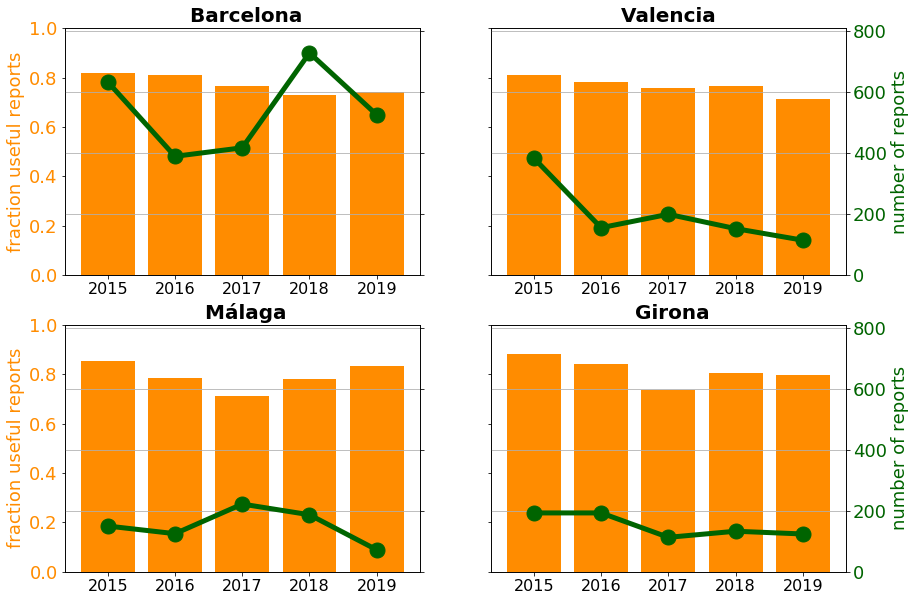

In [56]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for idx, (city, cnt) in enumerate(np.array(Counter(final.city).most_common(5))[[0, 1, 3, 4]]):
    if city == 'NA':
        continue
    year_can_tell_fraction = []
    n_imgs = []
    years = [2015, 2016, 2017, 2018, 2019]
    for i in years:
        y = final[(final.year == i) & (final.city == city)]
        cannottell = len(y[y.useful == 0])/(len(y) + 1e-6)
        n_imgs.append(len(y))
        year_can_tell_fraction.append(1 - cannottell)

        
        
    if city[:4] == ' Val':
        city = 'Valencia'
    axs[idx//2, idx%2].set_title(city, fontsize=20, fontweight='bold')
    axs[idx//2, idx%2].bar(years, year_can_tell_fraction, color='darkorange')
    
    if idx%2 == 0:
        axs[idx//2, idx%2].set_ylabel('fraction useful reports', fontsize=18, color='darkorange')
        axs[idx//2, idx%2].tick_params(axis='y', labelcolor='darkorange', labelsize=18)
    else:
        axs[idx//2, idx%2].set_yticklabels([])
    axs[idx//2, idx%2].tick_params(axis='x', labelsize=16, labelrotation=0)
    #axs[idx//2, idx%2].set_xticklabels(['2014', '2015', '2016'])
    axs[idx//2, idx%2].set_ylim(0, 1)
    

    ax2 = axs[idx//2, idx%2].twinx()
    ax2.plot(years, n_imgs, 'o-', c='darkgreen', lw=5, ms=15)
    
    if idx%2 == 1:
        ax2.set_ylabel('number of reports', fontsize=18, color='darkgreen')
        ax2.tick_params(axis='y', labelcolor='darkgreen', labelsize=18)
    else:
        ax2.set_yticklabels([])
        ax2.tick_params(axis='y', labelcolor='darkgreen', labelsize=18)
    #else:
    #    ax2.set_ticklabels([], [])
    ax2.set_ylim(0, 810)

    ax2.grid()
#plt.tight_layout(pad=0.1, w_pad=0., h_pad=.0)
plt.show()

In [26]:
for y in [2015, 2016, 2017, 2018, 2019]:
    tmp = final[final.year == y]
    print(y, '-' ,  np.round(tmp.useful.mean(), 2), '%')

2015 - 0.83 %
2016 - 0.79 %
2017 - 0.73 %
2018 - 0.72 %
2019 - 0.77 %
